In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras


In [ ]:
train= pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
test= pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [ ]:
train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
train_open= train.iloc[:, 1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [ ]:
train_open_scaled[60]

array([0.77007299])

In [ ]:
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [ ]:
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [ ]:
xtrain.shape

(1975, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
regression= Sequential()
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
regression.add(Dense(units=1))
regression.compile(optimizer='adam',loss='mean_squared_error')
regression.fit(xtrain,ytrain,batch_size=30,epochs=20)

Epoch 1/20
66/66 [==============================] - 15s 120ms/step - loss: 0.0135
Epoch 2/20
66/66 [==============================] - 8s 129ms/step - loss: 0.0029
Epoch 3/20
66/66 [==============================] - 9s 135ms/step - loss: 0.0027
Epoch 4/20
66/66 [==============================] - 8s 121ms/step - loss: 0.0027
Epoch 5/20
66/66 [==============================] - 8s 120ms/step - loss: 0.0027
Epoch 6/20
66/66 [==============================] - 8s 122ms/step - loss: 0.0024
Epoch 7/20
66/66 [==============================] - 8s 119ms/step - loss: 0.0028
Epoch 8/20
66/66 [==============================] - 8s 119ms/step - loss: 0.0023
Epoch 9/20
66/66 [==============================] - 8s 120ms/step - loss: 0.0020
Epoch 10/20
66/66 [==============================] - 8s 124ms/step - loss: 0.0018
Epoch 11/20
66/66 [==============================] - 8s 124ms/step - loss: 0.0018
Epoch 12/20
66/66 [==============================] - 8s 118ms/step - loss: 0.0016
Epoch 13/20
66/66 [=====

In [ ]:
test_open= test.iloc[:, 1:2].values 
total= pd.concat([train['Open'],test['Open']],axis=0) 
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) 
test_input= ss.transform(test_input)

In [ ]:
xtest= []
for i in range(60,80):
    xtest.append(test_input[i-60:i,0])

In [ ]:
xtest= np.array(xtest)

In [ ]:
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= regression.predict(xtest)

In [ ]:
predicted_value= ss.inverse_transform(predicted_value)

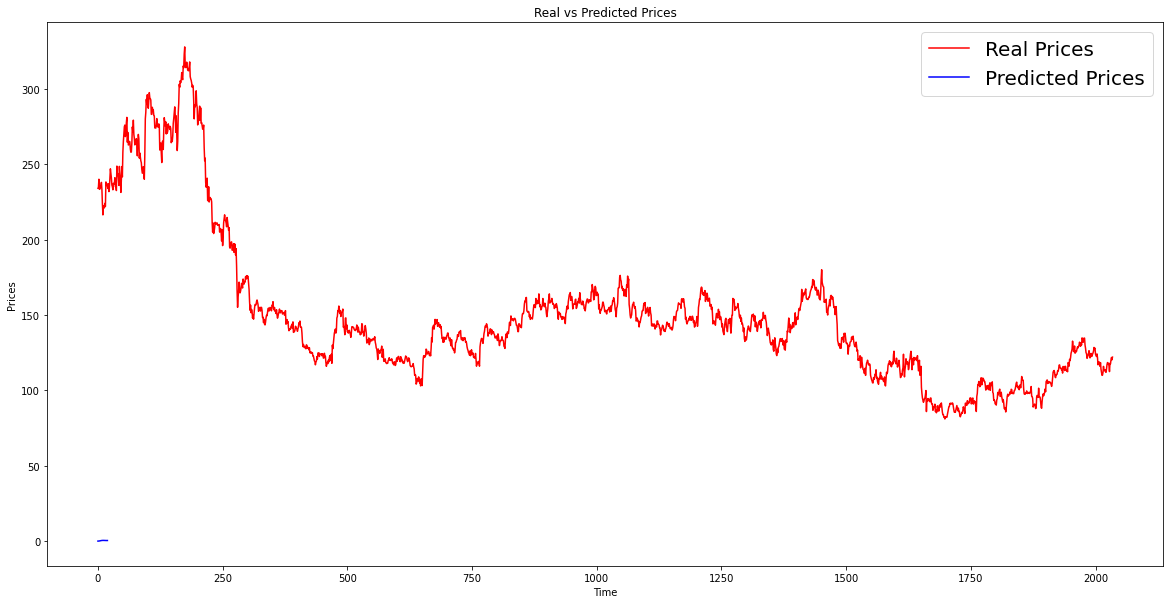

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)